<a href="https://colab.research.google.com/github/MiLAchain/IMA-Restaurant-Expansion/blob/main/BDAO_IMA_merge_datasets_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Authentication**

Everytime before you make connection to Google Cloud via API, you need to run the below code to grant access to Google Cloud services.

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data_merged" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open,...,category_Barbeque,category_Beer,category_Buffets,category_Cheesesteaks,category_Desserts,category_HotDogs,category_IceCream_FrozenYogurt,category_JuiceBars_Smoothies,category_Soup,category_Tacos
0,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,53.517939,-113.497135,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,53.554659,-113.493040,2.0,12,0,1,...,0,0,0,0,0,0,0,0,0,0
2,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,53.559141,-113.621998,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
3,kQzmD7eWIS-MuUlGGBclVA,Plow & Harvest,Edmonton,AB,53.540727,-113.614795,2.0,17,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-iOgafQZPQAiLJZwegPseQ,Montana's BBQ & Bar,Edmonton,AB,53.476212,-113.494882,2.0,24,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
drop_list = ['latitude','longitude','category_Tacos','category_JuiceBars_Smoothies','category_IceCream_FrozenYogurt','category_SpecialtyFood','category_Caterers',
             'category_EventPlanning_Services','category_Buffets','category_Cheesesteaks','category_Food','category_Soup','category_Desserts','General_Category']
for i in drop_list:
  restaurant_df.drop(i, axis=1, inplace=True)

restaurant_df.head()

,business_id,name,city,state,stars,review_count,is_open,not_open,category_American_New_,category_American_Traditional_,...,category_Pizza,category_Salad,category_Sandwiches,category_Seafood,total_number_of_checkin,category_Bagels,category_Bakeries,category_Barbeque,category_Beer,category_HotDogs
0,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,2.0,5,0,1,0,0,...,0,0,0,0,4,0,0,0,0,0
1,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,2.0,12,0,1,0,0,...,0,0,0,0,10,0,0,0,0,0
2,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,2.0,5,0,1,0,0,...,0,0,0,0,11,0,0,0,0,0
3,kQzmD7eWIS-MuUlGGBclVA,Plow & Harvest,Edmonton,AB,2.0,17,0,1,0,0,...,0,0,0,0,7,0,0,0,0,0
4,-iOgafQZPQAiLJZwegPseQ,Montana's BBQ & Bar,Edmonton,AB,2.0,24,0,1,0,1,...,0,0,0,0,27,0,0,0,0,0


Until here, you have successfully loaded all data into your data warehouse (BigQuery) in Google Cloud.

# **Query data from BigQuery and do analysis**

Now that the data is stored in BigQuery, you can make connection to BigQuery and extract data you want.

### Query all data from restaurant data file

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

### Query required data from restaurant data file

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, name, city, state, latitude,	longitude, stars, review_count, is_open
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open
0,bw90rjFL02A_8rVE34m5Lg,Cosmetic Solutions,Lula Lula,HI,38.816486,-90.321750,3.5,17,1
1,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0
2,gCF0QQWzI9lDouhLfTbYCA,MudMan Food Truck,Kalispell,MT,27.789678,-82.680746,5.0,6,0
3,1H9WYGFJ4AFwXq7WCOOMtg,Two Elk Restaurant,Vail,CO,32.094854,-110.773491,3.5,12,0
4,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,Liverpool,XMS,38.673049,-90.423156,4.0,5,1


In [ ]:
destination_table = 'restaurant_dataset.HaiyaBengNole'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 5966.29it/s]


# **Data processing and data analysis**

### Chck the dataset (shape,dtype,NaN and Duplicate)

In [ ]:
restaurant_df.shape

(52286, 9)

In [ ]:
restaurant_df.dtypes

business_id      object
name             object
city             object
state            object
latitude        float64
longitude       float64
stars           float64
review_count      Int64
is_open           Int64
dtype: object

In [ ]:
restaurant_df.isnull().sum()

business_id     0
name            0
city            0
state           0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

In [ ]:
# The number of duplicated rows:
print("\nCheck the duplicated rows:")
print(restaurant_df.duplicated().value_counts())


Check the duplicated rows:
False    52286
Name: count, dtype: int64


In [ ]:
restaurant_df = restaurant_df.drop_duplicates()
print(restaurant_df.duplicated().value_counts())

False    52286
Name: count, dtype: int64


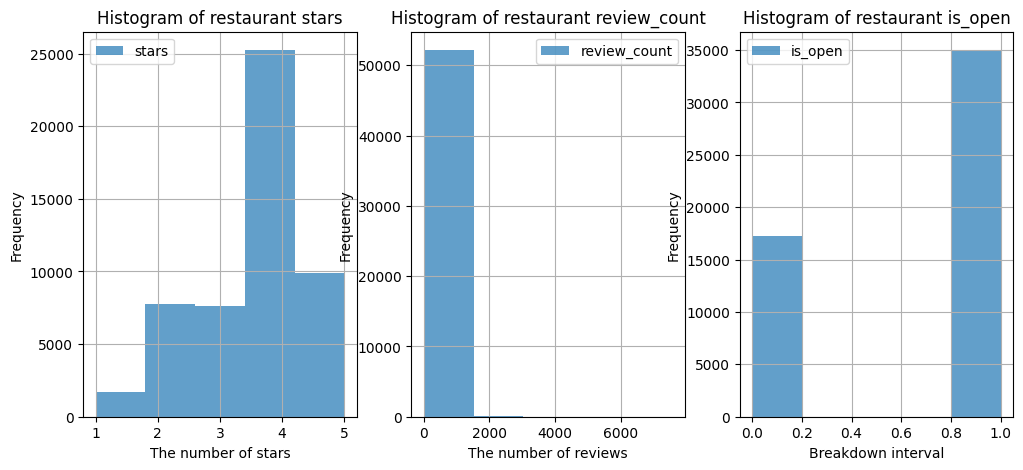

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))

# Visualization

# Histogram for stars
plt.subplot(1, 3, 1)
plt.hist(restaurant_df['stars'], bins= 5, alpha=0.7, label = ["stars"])
plt.title('Histogram of restaurant stars')
plt.xlabel('The number of stars')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Histogram for review_count
plt.subplot(1, 3, 2)
plt.hist(restaurant_df['review_count'], bins= 5, alpha=0.7, label = ["review_count"])
plt.title('Histogram of restaurant review_count')
plt.xlabel('The number of reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Histogram for is_open
plt.subplot(1, 3, 3)
plt.hist(restaurant_df['is_open'], bins= 5, alpha=0.7, label = ["is_open"])
plt.title('Histogram of restaurant is_open')
plt.xlabel('Breakdown interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

In [ ]:
import pandas as pd
import numpy as np

dict_restaurant = restaurant_df.iloc[:, -3:]

# Show the interval and counts of each bin
print("Interval division and counts in each bin")
counts, bin_edges = np.histogram(dict_restaurant.iloc[:, 0], 5)
print(bin_edges)
print(counts)
# 3.4-4.2的是最多的25242

print("Interval division and counts in each bin")
counts, bin_edges = np.histogram(dict_restaurant.iloc[:, 1], 3)
print(bin_edges)
print(counts)
# 评论数5.0-2526.0有52245


Interval division and counts in each bin
[1.  1.8 2.6 3.4 4.2 5. ]
[ 1728  7761  7641 25242  9914]
Interval division and counts in each bin
[5.0 2526.0 5047.0 7568.0]
[52245    34     7]


<Axes: ylabel='review_count'>

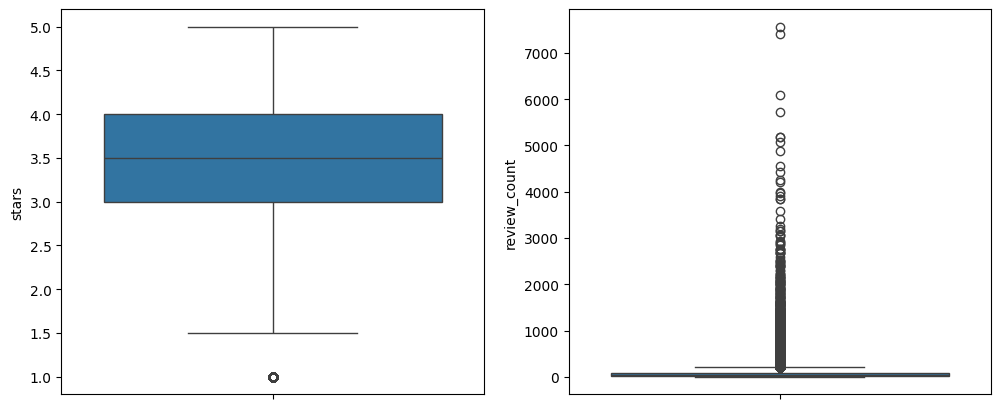

In [ ]:
plt.figure(figsize=(12, 5))

# Visualization

# Boxplot for stars
plt.subplot(1, 2, 1)
sns.boxplot(data=restaurant_df['stars'])

# Boxplot for review_count
plt.subplot(1, 2, 2)
sns.boxplot(data=restaurant_df['review_count'])


In [ ]:
# Generate a new column "not_open" in df

# replace 0 and 1 in "is open" and store in new col
restaurant_df['not_open'] = restaurant_df['is_open'].replace({0: 1, 1: 0})

restaurant_df

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open
0,bw90rjFL02A_8rVE34m5Lg,Cosmetic Solutions,Lula Lula,HI,38.816486,-90.321750,3.5,17,1,0
1,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1
2,gCF0QQWzI9lDouhLfTbYCA,MudMan Food Truck,Kalispell,MT,27.789678,-82.680746,5.0,6,0,1
3,1H9WYGFJ4AFwXq7WCOOMtg,Two Elk Restaurant,Vail,CO,32.094854,-110.773491,3.5,12,0,1
4,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,Liverpool,XMS,38.673049,-90.423156,4.0,5,1,0
...,...,...,...,...,...,...,...,...,...,...
52281,CLqNKOlBfo5844mng7CZfw,Molinari's,Franklin,TN,35.954431,-86.802116,3.5,132,0,1
52282,EG_wLI1KjAk_FpIRTj4T8Q,Kawai Poke Co.,Nashville,TN,36.175315,-86.756486,4.5,66,1,0
52283,SX3amTn_wdaYabPpFrqVNQ,Franklin Soul,Franklin,TN,35.956799,-86.802399,4.5,105,0,1
52284,nwCr13LeZQ4LuQH7ZrQlmg,Delicias De El Salvador,Nashville,TN,36.127868,-86.710876,4.0,8,1,0


In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'you_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_dataset.restaurant_data_location_analysis'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 1252.40it/s]


## Condition: CA (Target State)

In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT business_id, name, city, state, latitude,	longitude, stars, review_count, is_open
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE state = 'CA'
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open
0,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,Santa Barbara,CA,34.423302,-119.705471,4.5,116,1
1,JWFpjvCc_nkNDVtMPx1ZGg,Bogo SB,Santa Barbara,CA,34.423043,-119.703286,4.5,12,1
2,9L-MR0arflwFMF9szEBOOg,California Wine Festival,Santa Barbara,CA,34.414466,-119.685190,4.5,7,1
3,aYMpjij5ShtEoZueMrQPRw,The Mill,Santa Barbara,CA,34.421119,-119.690633,4.0,5,1
4,nTZuJSfwCoNOyA1yS3rbOQ,The Silver Bough,Santa Barbara,CA,34.421245,-119.640407,4.5,7,0


In [ ]:
restaurant_df.shape

(1161, 9)

In [ ]:
unique_cities = restaurant_df['city'].unique()
print(unique_cities)

['Santa Barbara' 'Carpinteria' 'Isla Vista' 'Goleta' 'Montecito'
 'Summerland' 'Santa  Barbara' 'Truckee']


In [ ]:
# replace the 'Santa  Barbara'
restaurant_df["city"] = restaurant_df["city"].replace("Santa  Barbara", "Santa Barbara")

In [ ]:
unique_cities = restaurant_df['city'].unique()
print(unique_cities)

['Santa Barbara' 'Carpinteria' 'Isla Vista' 'Goleta' 'Montecito'
 'Summerland' 'Truckee']


In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'you_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_dataset.restaurant_data_CA_analysis'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 5269.23it/s]


## Combine category and location

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_data_location_analysis" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open
0,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1
1,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,53.517939,-113.497135,2.0,5,0,1
2,qBXTiCDpmmfTkh5UgWrLFg,Buster's Pizza,Edmonton,AB,53.542025,-113.618985,2.0,6,0,1
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,53.554659,-113.493040,2.0,12,0,1
4,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,53.559141,-113.621998,2.0,5,0,1


In [ ]:
restaurant_df.shape

(52286, 10)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "category" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

category_df = query_job.to_dataframe()
category_df.head()

,business_id,category_American_New_,category_American_Traditional_,category_Bars,category_Breakfast_Brunch,category_Burgers,category_Cafes,category_Caterers,category_ChickenWings,category_Chinese,...,category_Food,category_Italian,category_Mexican,category_Nightlife,category_Pizza,category_Salad,category_Sandwiches,category_Seafood,category_SpecialtyFood,General_Category
0,lVlOhVi4KPR6atfQL7I_TA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
1,KeyPZRah-zG4UXMPQQQXkw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
2,N2g0Com0YXFgRLIR4KLEuQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
3,CCWH-7dU8-Hf3eu_EdmcQA,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
4,3KHMsKjecB70PAI1Vlv8WA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other


In [ ]:
category_df.shape

(52286, 24)

In [ ]:
import pandas as pd
merged_df = pd.merge(restaurant_df, category_df, on="business_id")
merged_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open,...,category_Food,category_Italian,category_Mexican,category_Nightlife,category_Pizza,category_Salad,category_Sandwiches,category_Seafood,category_SpecialtyFood,General_Category
0,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1,...,1,0,0,0,0,0,0,0,0,Casual Dining and Drinks
1,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,53.517939,-113.497135,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,Other
2,qBXTiCDpmmfTkh5UgWrLFg,Buster's Pizza,Edmonton,AB,53.542025,-113.618985,2.0,6,0,1,...,0,0,0,0,1,0,0,0,0,Specific Food Types
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,53.554659,-113.493040,2.0,12,0,1,...,0,0,0,0,0,0,0,0,0,Other
4,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,53.559141,-113.621998,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,Other


In [ ]:
file_path = 'restaurant_data_cleaned_df.csv'

merged_df.to_csv(file_path, index=False)

## Combine Checkin data and restaurant data

## clean the checkin_dataset

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "restaurant_checkin"

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, total_number_of_checkin, year
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,total_number_of_checkin,year
0,2xxkaRy7rP5EUyjFt2J5kA,769,2022
1,C6KP0hSutumHzLDCFyjvJQ,1025,2022
2,D4Uw7MZVGd4QLZF_dxk-Pw,1537,2022
3,3p60SCbWgBMCw7UcREExMw,2,2022
4,Q7volAn6495EXjU9MmeVZg,4,2022


In [ ]:
# The number of duplicated rows:
print("\nCheck the duplicated rows:")
print(checkin_df.duplicated().value_counts())


Check the duplicated rows:
True     8183313
False     332269
Name: count, dtype: int64


In [ ]:
checkin_df = checkin_df.drop_duplicates()
print(checkin_df.duplicated().value_counts())

False    332269
Name: count, dtype: int64


In [ ]:
checkin_df.head()

,business_id,total_number_of_checkin,year
0,2xxkaRy7rP5EUyjFt2J5kA,769,2022
1,C6KP0hSutumHzLDCFyjvJQ,1025,2022
2,D4Uw7MZVGd4QLZF_dxk-Pw,1537,2022
3,3p60SCbWgBMCw7UcREExMw,2,2022
4,Q7volAn6495EXjU9MmeVZg,4,2022


In [ ]:
filtered_df = checkin_df[checkin_df['business_id'] == '2xxkaRy7rP5EUyjFt2J5kA']
filtered_df
# The total number of checkin is same in every year

,business_id,total_number_of_checkin,year
0,2xxkaRy7rP5EUyjFt2J5kA,769,2022
782592,2xxkaRy7rP5EUyjFt2J5kA,769,2019
782593,2xxkaRy7rP5EUyjFt2J5kA,769,2016
782594,2xxkaRy7rP5EUyjFt2J5kA,769,2017
782595,2xxkaRy7rP5EUyjFt2J5kA,769,2018
1199391,2xxkaRy7rP5EUyjFt2J5kA,769,2020
1199392,2xxkaRy7rP5EUyjFt2J5kA,769,2021


In [ ]:
checkin_df = checkin_df.drop(columns=['year'])
checkin_df.head()

,business_id,total_number_of_checkin
0,2xxkaRy7rP5EUyjFt2J5kA,769
1,C6KP0hSutumHzLDCFyjvJQ,1025
2,D4Uw7MZVGd4QLZF_dxk-Pw,1537
3,3p60SCbWgBMCw7UcREExMw,2
4,Q7volAn6495EXjU9MmeVZg,4


In [ ]:
checkin_df.shape

(332269, 2)

In [ ]:
# The number of duplicated rows:
print("\nCheck the duplicated rows:")
print(checkin_df.duplicated().value_counts())


Check the duplicated rows:
True     280951
False     51318
Name: count, dtype: int64


In [ ]:
checkin_df = checkin_df.drop_duplicates()
print(checkin_df.duplicated().value_counts())

False    51318
Name: count, dtype: int64


In [ ]:
checkin_df.head()

,business_id,total_number_of_checkin
0,2xxkaRy7rP5EUyjFt2J5kA,769
1,C6KP0hSutumHzLDCFyjvJQ,1025
2,D4Uw7MZVGd4QLZF_dxk-Pw,1537
3,3p60SCbWgBMCw7UcREExMw,2
4,Q7volAn6495EXjU9MmeVZg,4


In [ ]:
checkin_df.shape

(51318, 2)

In [ ]:
file_path = 'total_checkin.csv'

checkin_df.to_csv(file_path, index=False)

## Combine cleaned "checkin_data" with cleaned "restaurant_data"

In [ ]:
merged_df.shape

(52286, 33)

In [ ]:
merged_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open,...,category_Food,category_Italian,category_Mexican,category_Nightlife,category_Pizza,category_Salad,category_Sandwiches,category_Seafood,category_SpecialtyFood,General_Category
0,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1,...,1,0,0,0,0,0,0,0,0,Casual Dining and Drinks
1,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,53.517939,-113.497135,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,Other
2,qBXTiCDpmmfTkh5UgWrLFg,Buster's Pizza,Edmonton,AB,53.542025,-113.618985,2.0,6,0,1,...,0,0,0,0,1,0,0,0,0,Specific Food Types
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,53.554659,-113.493040,2.0,12,0,1,...,0,0,0,0,0,0,0,0,0,Other
4,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,53.559141,-113.621998,2.0,5,0,1,...,0,0,0,0,0,0,0,0,0,Other


In [ ]:
final_df = pd.merge(merged_df, checkin_df, on="business_id")
final_df.shape

(51318, 34)

In [ ]:
file_path = 'merged_restaurant_data.csv'

final_df.to_csv(file_path, index=False)

## Combine with food categories

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "whyso-project-0621"
dataset_name = "restaurant_dataset"
table_name = "food_df_edited"

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

food_df = query_job.to_dataframe()
food_df.head()

,business_id,category_Bagels,category_Bakeries,category_Barbeque,category_Beer,category_Breakfast_Brunch,category_Buffets,category_Burgers,category_Cheesesteaks,category_ChickenWings,category_Coffee_Tea,category_Desserts,category_HotDogs,category_IceCream_FrozenYogurt,category_JuiceBars_Smoothies,category_Pizza,category_Salad,category_Sandwiches,category_Soup,category_Tacos
0,kfNv-JZpuN6TVNSO6hHdkw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ABxoFuzZy5mqQ8C5FJJajQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,RK6-cJ9hj53RzOlCBmpT-g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,EuRGgOwJ0g1vTj2R04j37Q,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,pmuuoDqNZp7518AUd-YmPA,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
food_df.shape

(52286, 20)

In [ ]:
final_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,not_open,...,category_Italian,category_Mexican,category_Nightlife,category_Pizza,category_Salad,category_Sandwiches,category_Seafood,category_SpecialtyFood,General_Category,total_number_of_checkin
0,em474WuTw7-OkhPfX4EohA,IHOP,Boone,NC,36.378837,-86.463779,2.0,29,0,1,...,0,0,0,0,0,0,0,0,Casual Dining and Drinks,10
1,61YkH57gZYrRk1R5-P-AxA,Kebab Express,Edmonton,AB,53.517939,-113.497135,2.0,5,0,1,...,0,0,0,0,0,0,0,0,Other,4
2,qBXTiCDpmmfTkh5UgWrLFg,Buster's Pizza,Edmonton,AB,53.542025,-113.618985,2.0,6,0,1,...,0,0,0,1,0,0,0,0,Specific Food Types,4
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,Edmonton,AB,53.554659,-113.493040,2.0,12,0,1,...,0,0,0,0,0,0,0,0,Other,10
4,vsRHKHe7kKEU0n1uWlGhtw,David Morris Fine Cars,Edmonton,AB,53.559141,-113.621998,2.0,5,0,1,...,0,0,0,0,0,0,0,0,Other,11


### Check repeated column between food_df and

In [ ]:
# all columns in final_df
final_df_columns = final_df.columns[1:32]

# all columns in food_df
food_df_columns = food_df.columns

# check wheather exsit in food_df or not
duplicate_columns = final_df_columns[final_df_columns.isin(food_df_columns)]

#
print("repeated column:", duplicate_columns)

repeated column: Index(['category_Breakfast_Brunch', 'category_Burgers',
       'category_ChickenWings', 'category_Coffee_Tea', 'category_Pizza',
       'category_Salad', 'category_Sandwiches'],
      dtype='object')


In [ ]:
# drop them in food_df
food_df = food_df.drop(columns=duplicate_columns)

In [ ]:
food_df.shape

(52286, 13)

In [ ]:
final_merged_df = pd.merge(final_df, food_df, on="business_id")
final_merged_df.shape

(51318, 46)

In [ ]:
file_path = 'final_merged_restaurant_data.csv'

final_merged_df.to_csv(file_path, index=False)

In [ ]:
destination_table = 'restaurant_dataset.restaurant_data_merged'
project_id = 'whyso-project-0621'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
final_merged_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

In [ ]:
final_merged_df.isnull().sum()

business_id                        0
name                               0
city                               0
state                              0
latitude                           0
longitude                          0
stars                              0
review_count                       0
is_open                            0
not_open                           0
category_American_New_             0
category_American_Traditional_     0
category_Bars                      0
category_Breakfast_Brunch          0
category_Burgers                   0
category_Cafes                     0
category_Caterers                  0
category_ChickenWings              0
category_Chinese                   0
category_Coffee_Tea                0
category_Delis                     0
category_EventPlanning_Services    0
category_FastFood                  0
category_Food                      0
category_Italian                   0
category_Mexican                   0
category_Nightlife                 0
c